# Jupyter Notebook Visualisation

## Abstract

# Image Classifier and Test

# Evaluation Images 

### Importing needed tools

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

### Creating Test Images

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  107. 104.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

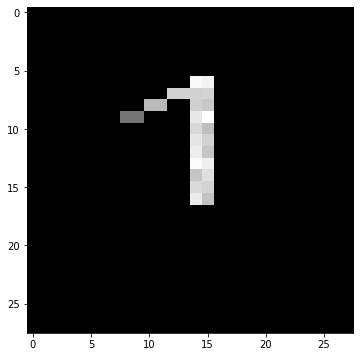

In [2]:
img_one = np.zeros([28, 28])
img_one[ 7:8, 12:16] = 90
img_one[ 8:9, 10:12] = 80 
img_one[ 9:10, 8:10] = 50 
img_one[ 6:17, 14:16] = 110 - np.random.randint(30, size=(11, 2))
print(img_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_one, cmap='gray')

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 78. 90. 83. 94. 81. 78. 78. 87

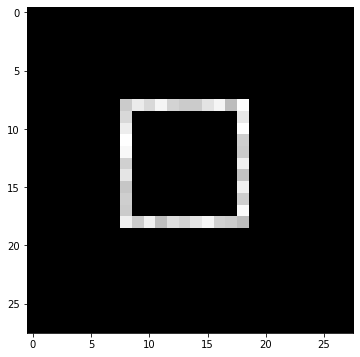

In [3]:
img_not_one = np.zeros([28, 28]) 
img_not_one [ 8:18, 8:9] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 8:18, 18:19] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 8:9, 8:19] = 100 - np.random.randint(30, size=(1, 11))
img_not_one [ 18:19, 8:19] = 100 - np.random.randint(30, size=(1, 11))
print(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray')

### Images are unrealistic, we can perform Morphological Image Operation to provide more realistic images

However morphological opening is defined in skimage module, we can performe that from scratch as erosion of dilation of image as define in "Morphological Image Analysis" Pierre Soile 

For structuring element B and set X, for:

Erosion define as:
<br>
$ \large \varepsilon_B(X) = { x | B_x \subseteq X}  $

Dilation define as:
<br>
$ \large \delta_B(X) = { x | B_x \cap X \neq \emptyset}  $

Closing of image f is defined as:
<br>
$ \large  \oslash_B(f) = \varepsilon_{\breve{B}}[\delta_B(X)] $

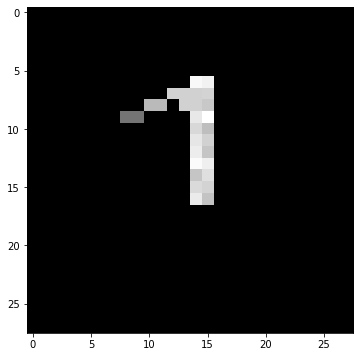

In [4]:
img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
plt.figure('object', figsize=(10,6))
plt.imshow(img_one , cmap='gray') 

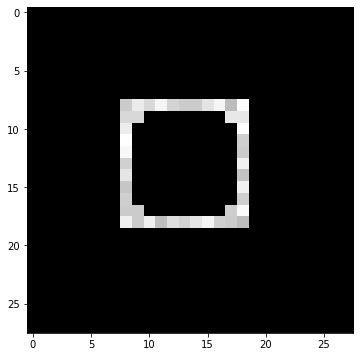

In [5]:
img_not_one = skimage.morphology.closing(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray') 

## Needed Class

In [6]:
class Test_Image:
    def is_one(self):
        #Image declaration
        img_one = np.zeros([15, 15])
        img_one = np.zeros([28, 28])
        img_one[ 7:8, 12:16] = 90
        img_one[ 8:9, 10:12] = 80 
        img_one[ 9:10, 8:10] = 50 
        img_one[ 6:17, 14:16] = 110 - np.random.randint(30, size=(11, 2))
        # To make Image more realistic we performe erosion of dilation of image
        img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
        return img_one
    def is_not_one(self):
        # Image declaration
        img_not_one = np.zeros([28, 28]) 
        img_not_one [ 8:18, 8:9] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one [ 8:18, 18:19] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one [ 8:9, 8:19] = 100 - np.random.randint(30, size=(1, 11))
        img_not_one [ 18:19, 8:19] = 100 - np.random.randint(30, size=(1, 11))
        # To make Image more realistic we performe erosion of dilation of image
        img_not_one = skimage.morphology.closing(img_not_one)
        return img_not_one

# Data Set

The MNIST (70000, 28 x 28) data set will be downloaded by TensorFlow.keras module, which provides us access to bigger data sets with higher quality data than sklearn.digits (1797, 8×8)

In [7]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

Standard splitting for training and test data, what's more, necessary data reshape

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

(60000, 28, 28)
(10000, 28, 28)


example of data set instance

(-0.5, 27.5, 27.5, -0.5)

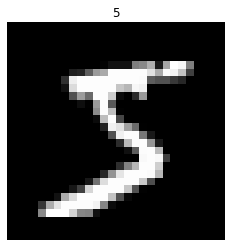

In [9]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(y_train[0])
plt.axis('off')

# First Model

As my first model I decided to choose, simple and basic Naive Bayes Classifier. To choose event model (distribution of features) first is needed to check data histogram

Text(0.5, 0, 'Label')

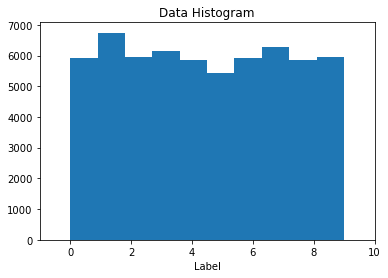

In [10]:
plt.hist(y_train)
plt.title('Data Histogram')
plt.xlim([-1, 10])
plt.xlabel("Label")

In [11]:
from sklearn.naive_bayes import ComplementNB
Bayesian = ComplementNB()

In [12]:
Bayesian.fit(X_train, y_train)

ComplementNB()

# Tests

[1]


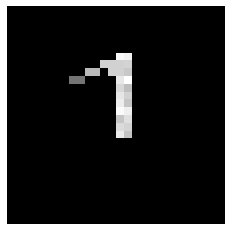

In [13]:
plt.imshow(img_one, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(img_one.reshape(784).reshape(1, -1))
print(y_pred)

As we see our Bayes Classifier correctly classified "1"

[7]


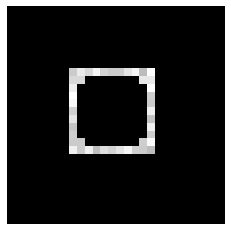

In [14]:
plt.imshow(img_not_one, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(img_not_one.reshape(784).reshape(1, -1))
print(y_pred)

As we see our Bayes Classifier incorrectly classified "0"

# References

Pierre Soile, Morphological Image Analysis
Principles and Applications: https://link.springer.com/book/10.1007/978-3-662-03939-7